In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/missing_value_imputation.csv')

In [6]:
df.head(2)

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,...,agePossession,description,property_id,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,6667.0,2.0,1.0,0,...,Relatively New,"2bhk affordable, ready to shift in sec 99a lax...",O66187314,500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,8101.0,2.0,2.0,3+,...,Relatively New,This lovely 2 bhk apartment/flat in sector 88a...,S69145532,1465.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
latlong = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/latlong.csv')

In [8]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [9]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [10]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [11]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [12]:
new_df = df.merge(latlong, on='sector')

In [13]:
new_df.head()

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,...,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,coordinates,latitude,longitude
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,6667.0,2.0,1.0,0,...,500.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4561° N, 76.9542° E",28.4561,76.9542
1,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,conscient habitat,0.35,6422.0,2.0,2.0,1,...,606.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4561° N, 76.9542° E",28.4561,76.9542
2,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,pareena laxmi apartments,0.32,6107.0,2.0,2.0,2,...,473.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4561° N, 76.9542° E",28.4561,76.9542
3,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,prime habitat,0.27,5433.0,2.0,2.0,1,...,552.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4561° N, 76.9542° E",28.4561,76.9542
4,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,raheja vanya,0.85,6789.0,2.0,2.0,2,...,1134.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4561° N, 76.9542° E",28.4561,76.9542


In [14]:
new_df.columns

Index(['property_name', 'property_type', 'link', 'sector', 'society', 'price',
       'price_per_sqft', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'agePossession', 'description', 'property_id',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'coordinates', 'latitude',
       'longitude'],
      dtype='object')

In [15]:
group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

<ipython-input-15-c837622b372e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]


In [16]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
sector 1,1.860000,8249.833333,2328.333333,28.3663,76.9456
sector 102,1.681327,10641.053097,1546.176991,28.4750,76.9715
sector 103,1.435909,7385.454545,1808.181818,28.4949,76.9845
sector 104,1.576620,8832.323944,1772.746479,28.4788,76.9960
sector 105,1.198000,10168.950000,1118.125500,28.4952,77.0114
...,...,...,...,...,...
sector 92,0.930571,5895.628571,1575.287429,28.4079,76.9153
sector 93,0.808182,8516.363636,941.272727,28.4153,76.9326
sector 95,0.486610,5595.305085,1011.881356,28.4172,76.9081


In [17]:
import plotly.express as px
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [18]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/dataprocessing_2.csv')

In [19]:
df1.columns

Index(['property_name', 'property_type', 'link', 'sector', 'society', 'price',
       'area', 'price_per_sqft', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'additionalRoom', 'address', 'floorNum', 'facing',
       'agePossession', 'nearbyLocations', 'description', 'furnishDetails',
       'features', 'rating', 'property_id'],
      dtype='object')

In [20]:
df['sector'].value_counts()

sector nearby sohna road    171
sector 102                  113
sector 85                   109
sector 92                   105
sector 69                    94
                           ... 
sector 40                     5
sector 80                     5
sector 73                     3
sector 17b                    3
sector 88b                    3
Name: sector, Length: 107, dtype: int64

In [21]:
df1['sector'].value_counts()

sector nearby sohna road    175
sector 102                  113
sector 85                   110
sector 92                   105
sector 69                    94
                           ... 
sector 73                     3
sector 17b                    3
sector 88b                    3
sector 17a                    3
sector 37                     1
Name: sector, Length: 110, dtype: int64

In [22]:
df.columns

Index(['property_name', 'property_type', 'link', 'sector', 'society', 'price',
       'price_per_sqft', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'agePossession', 'description', 'property_id',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type'],
      dtype='object')

In [124]:
wordcloud_df = df1[['features','sector']]

In [125]:
wordcloud_df.dropna(inplace=True)

<ipython-input-125-e21b1fcd2c07>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
wordcloud_df.shape

(3765, 2)

In [126]:
wordcloud_df.shape

(3143, 2)

In [123]:
sorted(wordcloud_df['sector'].unique().tolist())

['sector 1',
 'sector 102',
 'sector 103',
 'sector 104',
 'sector 105',
 'sector 106',
 'sector 107',
 'sector 108',
 'sector 109',
 'sector 10a',
 'sector 11',
 'sector 110',
 'sector 111',
 'sector 112',
 'sector 113',
 'sector 12',
 'sector 13',
 'sector 14',
 'sector 15',
 'sector 17',
 'sector 17a',
 'sector 17b',
 'sector 2',
 'sector 21',
 'sector 22',
 'sector 23',
 'sector 24',
 'sector 25',
 'sector 26',
 'sector 27',
 'sector 28',
 'sector 3',
 'sector 30',
 'sector 31',
 'sector 33',
 'sector 36',
 'sector 36a',
 'sector 37',
 'sector 37c',
 'sector 37d',
 'sector 38',
 'sector 39',
 'sector 4',
 'sector 40',
 'sector 41',
 'sector 43',
 'sector 45',
 'sector 46',
 'sector 47',
 'sector 48',
 'sector 49',
 'sector 5',
 'sector 50',
 'sector 51',
 'sector 52',
 'sector 53',
 'sector 54',
 'sector 55',
 'sector 56',
 'sector 57',
 'sector 58',
 'sector 59',
 'sector 6',
 'sector 60',
 'sector 61',
 'sector 62',
 'sector 63',
 'sector 63a',
 'sector 65',
 'sector 66',
 'secto

In [111]:
sorted(wordcloud_df['sector'].value_counts().to_list())

[1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 14,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 19,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 24,
 25,
 26,
 27,
 27,
 28,
 28,
 35,
 35,
 35,
 36,
 36,
 37,
 39,
 40,
 43,
 43,
 44,
 47,
 47,
 48,
 48,
 48,
 49,
 50,
 50,
 51,
 54,
 55,
 56,
 57,
 60,
 60,
 63,
 63,
 65,
 67,
 77,
 80,
 84,
 84,
 86,
 87,
 103,
 105,
 142]

In [127]:
import pickle
pickle.dump(wordcloud_df, open('wordcloud_df.pkl','wb'))

In [ ]:
wordcloud_df['sector']

In [89]:
wordcloud_df.head()

,features,sector
0,NaN,sector 99a
1,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 88a
2,"['Maintenance Staff', 'Water Storage', 'Waste ...",sector 54
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 37d
4,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 83


In [83]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [87]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

SyntaxError: ignored

In [86]:
main

['Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Maintenance Staff',
 'Water Storage',
 'Waste Disposal',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Low Density Society',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'R

In [27]:
from wordcloud import WordCloud

In [28]:
feature_text = ' '.join(main)

In [29]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [58]:
wordcloud_df['features'].iloc[10]

['Power Back-up',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting']

In [34]:
find_sectors = wordcloud_df['sector'].dropna()
find_sectors.head()

0    sector 99a
1    sector 88a
2     sector 54
3    sector 37d
4     sector 83
Name: sector, dtype: object

In [51]:
wordcloud_df.dropna(inplace=True)

<ipython-input-51-e21b1fcd2c07>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
# features_list = wordcloud_df['features'].iloc[1]
# sector_value = wordcloud_df[sector.columns].iloc[1]

# # Accessing the first element of the list at index 1 of the 'features' column
# first_feature_in_list = features_list[:]

# print(sector_value)
# print(first_feature_in_list)

sector 54
['Maintenance Staff', 'Water Storage', 'Waste Disposal']


In [131]:
selected_location = st.selectbox("Popular Location", sorted(location_df.columns.to_list()))

NameError: ignored

In [130]:
selected_location

NameError: ignored

In [59]:
wordcloud_df.head(2)

,features,sector
1,"[Security / Fire Alarm, Power Back-up, Feng Sh...",sector 88a
2,"[Maintenance Staff, Water Storage, Waste Dispo...",sector 54


In [146]:
calll= 'sector 54'

In [147]:
res = wordcloud_df.loc[wordcloud_df['sector'] == calll]['features']

In [138]:
res

2       ['Maintenance Staff', 'Water Storage', 'Waste ...
234     ['Feng Shui / Vaastu Compliant', 'Security / F...
314     ['Power Back-up', 'Intercom Facility', 'Lift(s...
410     ['Feng Shui / Vaastu Compliant', 'Intercom Fac...
442     ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
466     ['Feng Shui / Vaastu Compliant', 'Private Gard...
531     ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
705     ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
972     ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
1001    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
1029    ['Security / Fire Alarm', 'Power Back-up', 'Fe...
1295    ['Feng Shui / Vaastu Compliant', 'High Ceiling...
1297    ['Centrally Air Conditioned', 'Water purifier'...
1369    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
1452    ['Feng Shui / Vaastu Compliant', 'Private Gard...
1466    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
1577    ['Centrally Air Conditioned', 'Water purifier'...
1846    ['Cent

In [139]:
main = []
for item in res.dropna().apply(ast.literal_eval):
    main.extend(item)

In [140]:
feature_text = ' '.join(main)

In [141]:
feature_text

'Maintenance Staff Water Storage Waste Disposal Feng Shui / Vaastu Compliant Security / Fire Alarm Private Garden / Terrace Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security Personnel Natural Light Power Back-up Intercom Facility Lift(s) Swimming Pool Maintenance Staff Park Visitor Parking Security Personnel Shopping Centre Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Park Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Separate entry for servant room No open drainage around Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Feng Shui / Vaastu Compliant Private Garden / Terrace Maintenance Staff Water

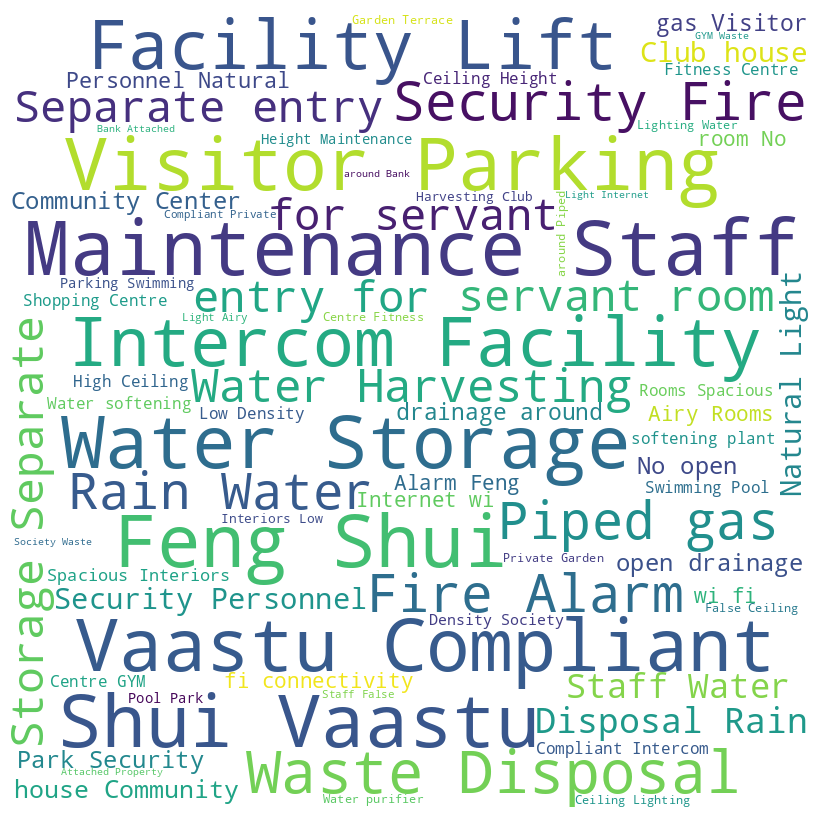

In [142]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()